# Problem Background

## Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

The company requires to build a model wherein we need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Data Dictionary

|Variables	|Description|
| -- | -- |
|Prospect ID	|A unique ID with which the customer is identified.
|Lead Number	|A lead number assigned to each lead procured.
|Lead Origin	|The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.
|Lead Source	|The source of the lead. Includes Google, Organic Search, Olark Chat, etc.
|Do Not Email	|An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.
|Do Not Call	|An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.
|Converted	|The target variable. Indicates whether a lead has been successfully converted or not.
|TotalVisits	|The total number of visits made by the customer on the website.
|Total Time Spent on Website	|The total time spent by the customer on the website.
|Page Views Per Visit	|Average number of pages on the website viewed during the visits.
|Last Activity	|Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.
|Country	|The country of the customer.
|Specialization	|The industry domain in which the customer worked before. Includes the level 'Select Specialization' which means the customer had not selected this option while filling the form.
|How did you hear about X Education	|The source from which the customer heard about X Education.
|What is your current occupation	|Indicates whether the customer is a student, umemployed or employed.
|What matters most to you in choosing this course	|An option selected by the customer indicating what is their main motto behind doing this course.
|Search	|Indicating whether the customer had seen the ad in any of the listed items.
|Magazine	
|Newspaper Article	
|X Education Forums	
|Newspaper	
|Digital Advertisement	
|Through Recommendations	|Indicates whether the customer came in through recommendations.
|Receive More Updates About Our Courses	|Indicates whether the customer chose to receive more updates about the courses.
|Tags	|Tags assigned to customers indicating the current status of the lead.
|Lead Quality	|Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
|Update me on Supply Chain Content	|Indicates whether the customer wants updates on the Supply Chain Content.
|Get updates on DM Content	|Indicates whether the customer wants updates on the DM Content.
|Lead Profile	|A lead level assigned to each customer based on their profile.
|City	|The city of the customer.
|Asymmetrique Activity Index	|An index and score assigned to each customer based on their activity and their profile
|Asymmetrique Profile Index	
|Asymmetrique Activity Score	
|Asymmetrique Profile Score	
|I agree to pay the amount through cheque	|Indicates whether the customer has agreed to pay the amount through cheque or not.
|a free copy of Mastering The Interview	|Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
|Last Notable Activity	|The last notable acitivity performed by the student.


# Pre Processing of i/p data

## Import libraries, data and inspect the i/p data

In [1578]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn import metrics

In [1579]:
leads = pd.read_csv("leads.csv")

In [1580]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [1581]:
leads.shape

(9240, 37)

In [1582]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [1583]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


Total Visits and Total Time Spent on Website looks to have some outliers. Will revisit them during processing

## Handle Null Values, Unwanted Columns, Outliers

### Null values

In [1584]:
leads.isnull().sum()/ len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

drop columns having more than 30% NA values

In [1585]:
leads = leads.dropna(thresh=0.70*len(leads), axis=1)

In [1586]:
leads.isnull().sum()/ len(leads)*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [1587]:
leads.shape

(9240, 31)

Still there are some columns with null values. lets check them individually before dropping them.

Before changing, lets convert all strings to lower call to club any similar values due to case

In [1588]:
# Converting string to lower case
leads = leads.applymap(lambda orgstr:orgstr.lower() if type(orgstr) == str else orgstr)

Lets change columns having more than 20% na first

In [1589]:
leads['Lead Profile'].value_counts()

select                         4146
potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

In [1590]:
leads['Lead Profile'].isna().sum()

2709

dropping such huge rows will be problem as well as joining them to any other category so lets create new category "not available"

In [1591]:
leads['Lead Profile'].fillna('not available', inplace = True)

In [1592]:
leads['Lead Profile'].value_counts()

select                         4146
not available                  2709
potential lead                 1613
other leads                     487
student of someschool           241
lateral student                  24
dual specialization student      20
Name: Lead Profile, dtype: int64

In [1593]:
leads['Lead Profile'].isna().sum()

0

In [1594]:
leads['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1595]:
leads['What matters most to you in choosing a course'].isna().sum()

2709

majority of this is occupied by better career prospects but adding NA to this will make this column of no use as 99% will belong to one category

hence lets assign 'not available' to NA values

In [1596]:
leads['What matters most to you in choosing a course'].fillna('not available', inplace = True)

In [1597]:
leads['What matters most to you in choosing a course'].value_counts()

better career prospects      6528
not available                2709
flexibility & convenience       2
other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [1598]:
leads['What matters most to you in choosing a course'].isna().sum()

0

In [1599]:
leads['What is your current occupation'].value_counts()

unemployed              5600
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [1600]:
leads['What is your current occupation'].isna().sum()

2690

same case, lets assign 'not available' to NA values

In [1601]:
leads['What is your current occupation'].fillna('not available', inplace = True)

In [1602]:
leads['What is your current occupation'].value_counts()

unemployed              5600
not available           2690
working professional     706
student                  210
other                     16
housewife                 10
businessman                8
Name: What is your current occupation, dtype: int64

In [1603]:
leads['What is your current occupation'].isna().sum()

0

In [1604]:
leads['How did you hear about X Education'].value_counts()

select                   5043
online search             808
word of mouth             348
student of someschool     310
other                     186
multiple sources          152
advertisements             70
social media               67
email                      26
sms                        23
Name: How did you hear about X Education, dtype: int64

In [1605]:
leads['How did you hear about X Education'].isna().sum()

2207

lets change this to 'other'

In [1606]:
leads['How did you hear about X Education'].fillna('other', inplace = True)

In [1607]:
leads['How did you hear about X Education'].isna().sum()

0

In [1608]:
leads['Country'].value_counts()

india                   6492
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
hong kong                  7
bahrain                    7
oman                       6
france                     6
unknown                    5
south africa               4
nigeria                    4
germany                    4
kuwait                     4
canada                     4
sweden                     3
china                      2
asia/pacific region        2
uganda                     2
bangladesh                 2
italy                      2
belgium                    2
netherlands                2
ghana                      2
philippines                2
russia                     1
switzerland                1
vietnam                    1
denmark                    1
tanzania                   1
liberia                    1
malaysia      

In [1609]:
leads['Country'].isna().sum()

2461

As can be seen, majority entries belongs to India, but the NA value is also huge so can't directly assign to India. Also there are many other countries but value count is very small. Lets drop all Non-India countries into one as below

In [1610]:
leads['Country'].fillna('not available', inplace = True)

In [1611]:
leads['Country'].isna().sum()

0

In [1612]:
def assign_country(name):

        if name == 'india':
            return 'india'
        elif name == 'not available':
            return 'not available'
        else:
            return 'outside india'

leads['Country'] = leads.apply(lambda name: assign_country(name['Country']), axis = 1)

In [1613]:
leads['Country'].value_counts()

india            6492
not available    2461
outside india     287
Name: Country, dtype: int64

In [1614]:
leads.isna().sum()/len(leads) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                           0.000000
Specialization                                   15.562771
How did you hear about X Education                0.000000
What is your current occupation                   0.000000
What matters most to you in choosing a course     0.000000
Search                                            0.0000

In [1615]:
leads.City.value_counts()

mumbai                         3222
select                         2249
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [1616]:
leads.City.isna().sum()

1420

Lets change this values to 'other cities'

In [1617]:
leads.City.fillna('not available', inplace = True)

In [1618]:
leads.City.value_counts()

mumbai                         3222
select                         2249
not available                  1420
thane & outskirts               752
other cities                    686
other cities of maharashtra     457
other metro cities              380
tier ii cities                   74
Name: City, dtype: int64

In [1619]:
leads.City.isna().sum()

0

In [1620]:
leads.Specialization.value_counts()

select                               1942
finance management                    976
human resource management             848
marketing management                  838
operations management                 503
business administration               403
it projects management                366
supply chain management               349
banking, investment and insurance     338
travel and tourism                    203
media and advertising                 203
international business                178
healthcare management                 159
hospitality management                114
e-commerce                            112
retail management                     100
rural and agribusiness                 73
e-business                             57
services excellence                    40
Name: Specialization, dtype: int64

In [1621]:
leads.Specialization.isna().sum()

1438

The NA value is too high and assigning any value will give wrong results. lets assign 'Not Available'

In [1622]:
leads['Specialization'].fillna('not available', axis = 0, inplace = True)

In [1623]:
leads.isnull().sum()/ len(leads)*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [1624]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [1625]:
leads['TotalVisits'].isna().sum()

137

In [1626]:
leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

lets drop NA rows

In [1627]:
leads.dropna(subset = 'TotalVisits', inplace = True)

In [1628]:
leads['TotalVisits'].isna().sum()

0

In [1629]:
leads['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [1630]:
leads.shape

(9103, 31)

In [1631]:
leads.isna().sum()/len(leads) * 100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.318576
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.000000
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.000000
Last Activity                                    0.000000
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [1632]:
leads['Lead Source'].value_counts()

google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64

In [1633]:
leads['Lead Source'].isna().sum()

29

its a small number so lets drop NA rows

In [1634]:
leads.shape

(9103, 31)

In [1635]:
leads.dropna(subset = 'Lead Source', inplace = True)

In [1636]:
leads.shape

(9074, 31)

In [1637]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

### Unwanted Columns

In [1638]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

lets get value count to each columns

In [1639]:
for col in leads:
    if col not in ('Prospect ID','Lead Number'):
        print('----' + col + '-----')
        print(leads[col].value_counts())

----Lead Origin-----
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----Lead Source-----
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64
----Do Not Email-----
no     8358
yes     716
Name: Do Not Email, dtype: int64
----Do Not Call-----
no     9072
yes       2
Name: Do Not Call, dtype: int64
----Converted-----
0    5639
1    3435
Name: Converted, dtype: int64
----TotalVisits-----


Below are the observations

 - Receive More Updates About Our Courses --> has only no value
 - Update me on Supply Chain Content --> has only no value
 - Get updates on DM Content --> has only no value
 - I agree to pay the amount through cheque --> has only no value

 
             Lets drop this columns as they wont add value to the analysis

In [1640]:
leads.drop(labels = ['Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque'], axis =1, inplace = True)

In [1641]:
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,no,no,no,select,select,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,no,no,no,select,select,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,no,no,no,potential lead,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified


In [1642]:
leads.shape

(9074, 27)

### Outliers

In [1643]:
leads.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99,.991,.992,.993,.994,.995])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
90%,650276.800000,1.000000,7.000000,1373.000000,5.000000
95%,655344.450000,1.000000,10.000000,1557.000000,6.000000
99%,659563.350000,1.000000,17.000000,1839.000000,9.000000


TotalVisits and Page Views Per Visit looks like have some outliers. Lets check TotalVisits first

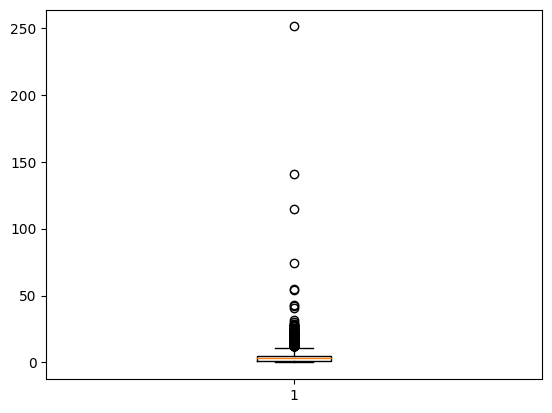

In [1644]:
plt.boxplot(leads['TotalVisits'])
plt.show()

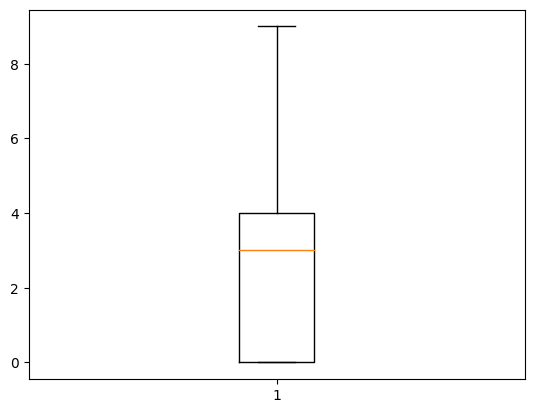

In [1645]:
plt.boxplot(leads[leads['TotalVisits']<10]['TotalVisits'])
plt.show()

In [1646]:
leads[leads['TotalVisits']<10]['TotalVisits'].describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99,.991,.992,.993,.994,.995])

count    8607.000000
mean        2.822470
std         2.345152
min         0.000000
25%         0.000000
50%         3.000000
75%         4.000000
90%         6.000000
95%         7.000000
99%         9.000000
99.1%       9.000000
99.2%       9.000000
99.3%       9.000000
99.4%       9.000000
99.5%       9.000000
max         9.000000
Name: TotalVisits, dtype: float64

In [1647]:
leads[leads['TotalVisits']<10]['TotalVisits'].count()

8607

In [1648]:
leads.shape

(9074, 27)

In [1649]:
(9078-8607)/9074*100

5.190654617588715

if we consider 10 as cutoffs, then we are dropping almost 5%. But it makes sense so lets drop these outliers

In [1650]:
leads1 = leads[leads['TotalVisits']<10]

In [1651]:
leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,no,no,no,select,select,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,no,no,no,select,select,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,no,no,no,potential lead,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified


In [1652]:
leads1.shape

(8607, 27)

Now lets check outliers again

In [1653]:
leads1.describe(percentiles=[0.25,0.5,0.75,0.9,0.95,0.99,.991,.992,.993,.994,.995])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8607.000000,8607.000000,8607.000000,8607.000000,8607.000000
mean,616990.018009,0.373301,2.822470,468.693505,2.221617
std,23323.938206,0.483709,2.345152,540.448128,1.884357
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596331.500000,0.000000,0.000000,0.000000,0.000000
50%,615333.000000,0.000000,3.000000,233.000000,2.000000
75%,637075.000000,1.000000,4.000000,887.000000,3.000000
90%,649992.800000,1.000000,6.000000,1360.000000,5.000000
95%,655251.500000,1.000000,7.000000,1546.700000,6.000000
99%,659566.700000,1.000000,9.000000,1825.820000,8.000000


Now even Page views per visit looks normal. 

## EDA - Data Visualization

### Categorical univarient Analysis

In [1654]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8607 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8607 non-null   object 
 1   Lead Number                                    8607 non-null   int64  
 2   Lead Origin                                    8607 non-null   object 
 3   Lead Source                                    8607 non-null   object 
 4   Do Not Email                                   8607 non-null   object 
 5   Do Not Call                                    8607 non-null   object 
 6   Converted                                      8607 non-null   int64  
 7   TotalVisits                                    8607 non-null   float64
 8   Total Time Spent on Website                    8607 non-null   int64  
 9   Page Views Per Visit                           8607 

In [1655]:
leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,no,no,no,select,select,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,no,no,no,select,select,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,no,no,no,potential lead,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified


In [1656]:
catvarlist = leads1.select_dtypes(include='object').columns

In [1657]:
len(catvarlist)

22

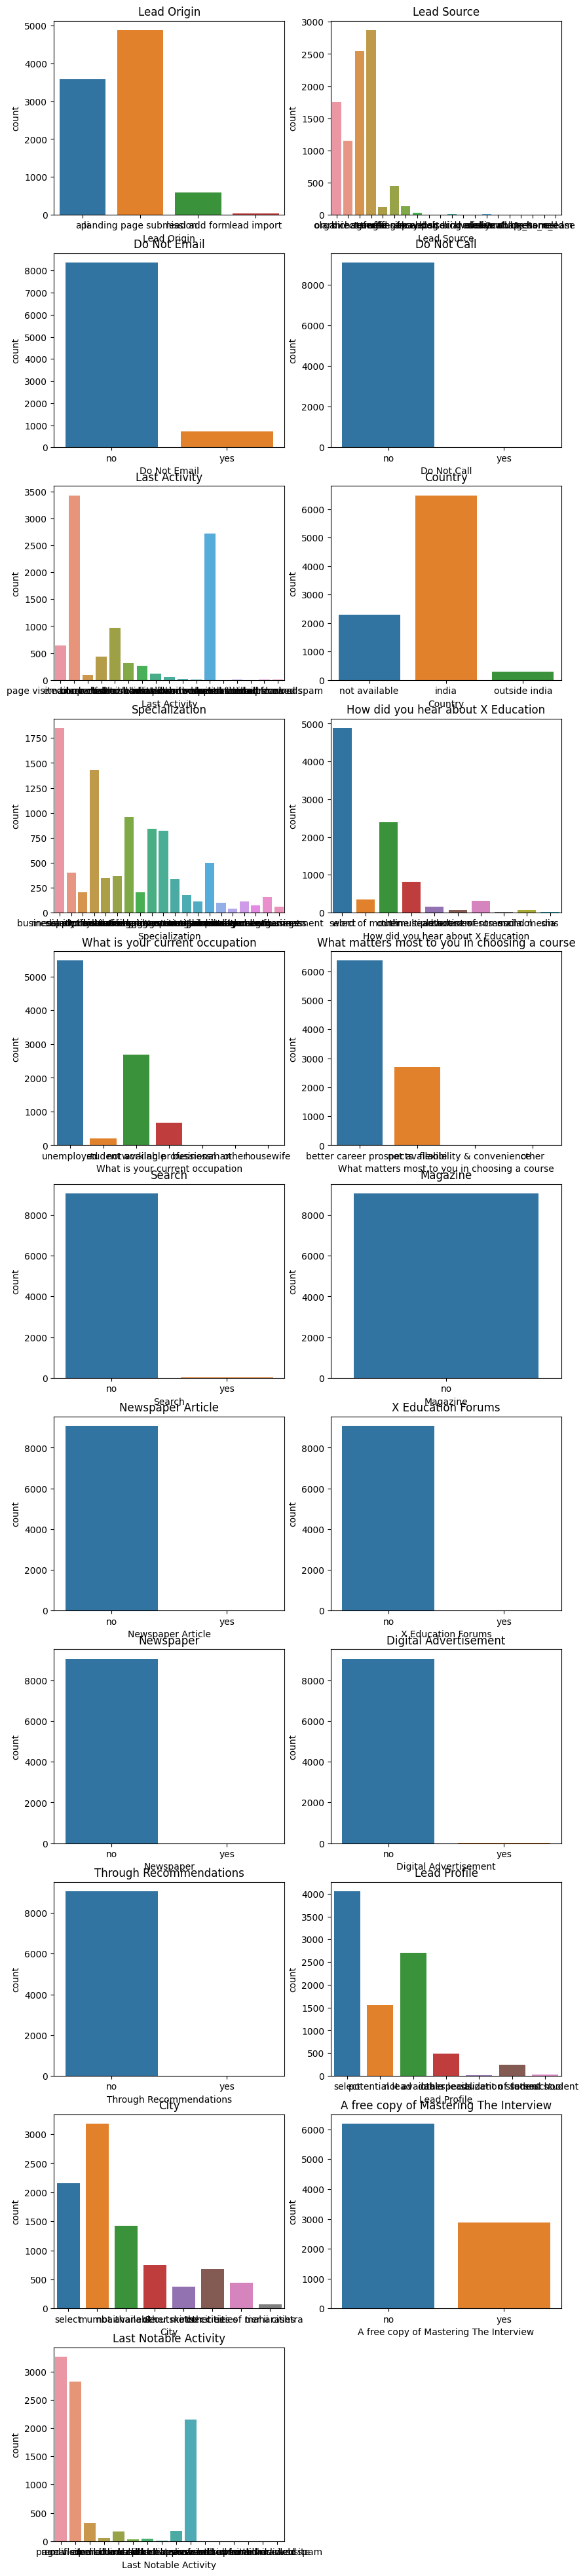

In [1658]:
plt.figure(figsize = (10,50))

i = 1
for var in catvarlist:
    if var != 'Prospect ID':
        plt.subplot(11,2,i)
        sns.countplot(leads[var])
        plt.title(var)
        i = i + 1

plt.show()

In [1659]:
leads1['Do Not Call'].value_counts()

no     8605
yes       2
Name: Do Not Call, dtype: int64

In [1660]:
leads1['Search'].value_counts()

no     8600
yes       7
Name: Search, dtype: int64

In [1661]:
leads1['Magazine'].value_counts()

no    8607
Name: Magazine, dtype: int64

In [1662]:
leads1['Newspaper Article'].value_counts()

no     8606
yes       1
Name: Newspaper Article, dtype: int64

In [1663]:
leads1['X Education Forums'].value_counts()

no    8607
Name: X Education Forums, dtype: int64

In [1664]:
leads1['Newspaper'].value_counts()

no    8607
Name: Newspaper, dtype: int64

In [1665]:
leads1['Digital Advertisement'].value_counts()

no     8604
yes       3
Name: Digital Advertisement, dtype: int64

In [1666]:
leads1['Through Recommendations'].value_counts()

no     8602
yes       5
Name: Through Recommendations, dtype: int64

As you can see, some of the fields having majority (more than 90-95% values in one category), we will see during model buidiling if we need to drop these variables or not

### Numerical univarient Analysis

In [1667]:
numvarlist = leads1.select_dtypes(exclude='object').columns

In [1668]:
len(numvarlist)

5

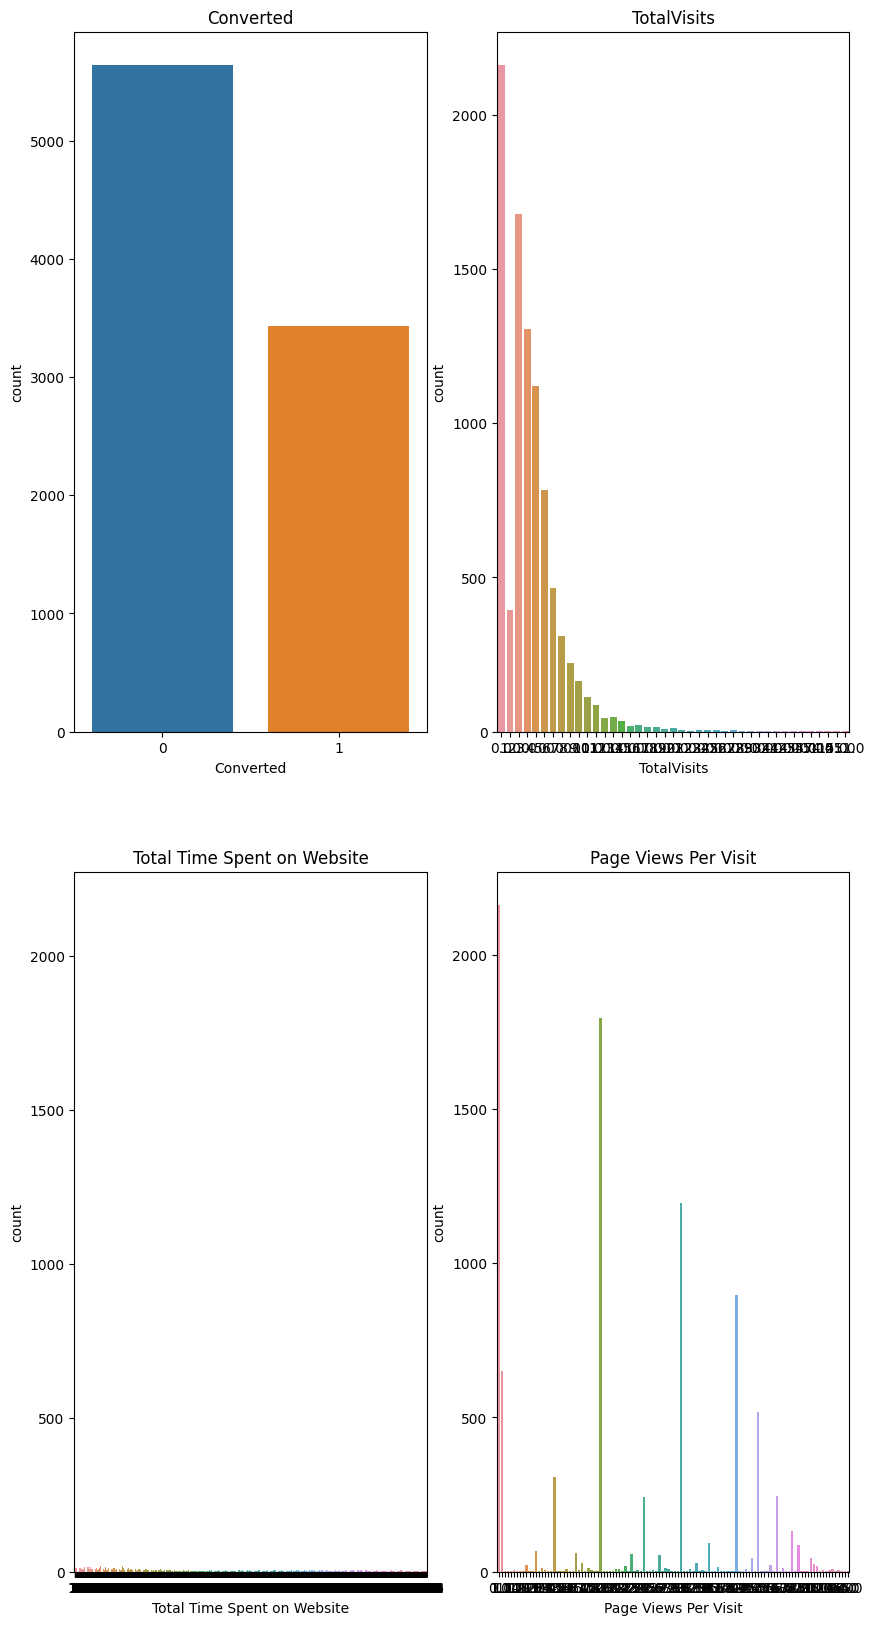

In [1669]:
plt.figure(figsize = (10,20))

i = 1
for var in numvarlist:
    if var != 'Lead Number':
        plt.subplot(2,2,i)
        sns.countplot(leads[var])
        plt.title(var)
        i = i + 1

plt.show()

In [1670]:
leads1['Total Time Spent on Website'].value_counts()

0       2165
60        19
127       17
234       17
157       16
        ... 
2037       1
1401       1
1214       1
911        1
1845       1
Name: Total Time Spent on Website, Length: 1681, dtype: int64

In [1671]:
leads1['Converted'].value_counts()

0    5394
1    3213
Name: Converted, dtype: int64

### Bi-Varient Analysis - Numerical - Numerical Analysis

In [1672]:
numvarlist = leads1.select_dtypes(exclude='object').columns
numvarlist = numvarlist.drop('Lead Number')

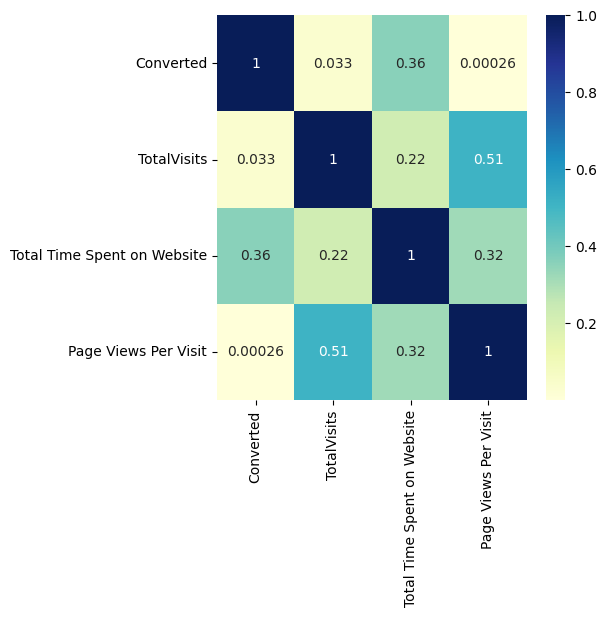

In [1673]:
plt.figure(figsize=(5,5))
sns.heatmap(leads[numvarlist].corr(), annot = True, cmap="YlGnBu")
plt.show()

### Bi-Varient Analysis - Categorial to Converted Analysis

In [1674]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8607 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8607 non-null   object 
 1   Lead Number                                    8607 non-null   int64  
 2   Lead Origin                                    8607 non-null   object 
 3   Lead Source                                    8607 non-null   object 
 4   Do Not Email                                   8607 non-null   object 
 5   Do Not Call                                    8607 non-null   object 
 6   Converted                                      8607 non-null   int64  
 7   TotalVisits                                    8607 non-null   float64
 8   Total Time Spent on Website                    8607 non-null   int64  
 9   Page Views Per Visit                           8607 

In [1675]:
catvarlist = leads1.select_dtypes(include='object').columns

len(catvarlist)

22

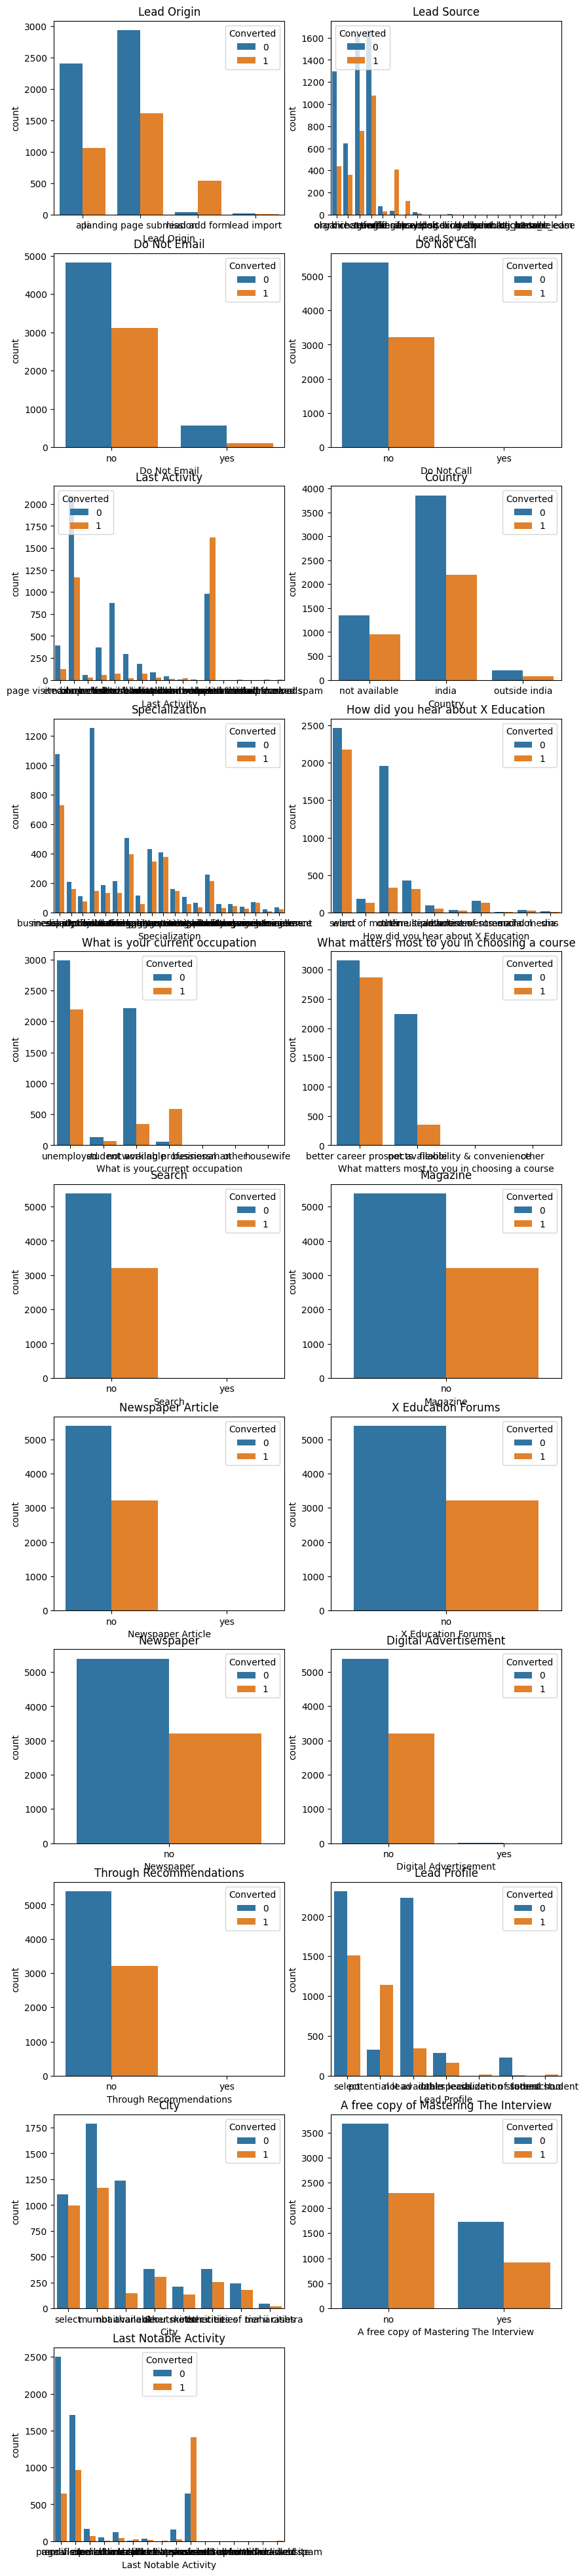

In [1676]:
plt.figure(figsize = (10,50))

i = 1
for var in catvarlist:
    if var != 'Prospect ID':
        plt.subplot(11,2,i)
        sns.countplot(x= var, hue = 'Converted', data = leads1)
        plt.title(var)
        i = i + 1

plt.show()

# Model building

## Pre-Processing

### Convert Binary Categorial variable into 1 and 0

In [1677]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [1678]:
leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,no,no,0,0.0,0,0.0,...,no,no,no,no,no,no,select,select,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,no,no,0,5.0,674,2.5,...,no,no,no,no,no,no,select,select,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,...,no,no,no,no,no,no,potential lead,mumbai,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,no,no,0,1.0,305,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,no,no,1,2.0,1428,1.0,...,no,no,no,no,no,no,select,mumbai,no,modified


In [1679]:
leads1['Do Not Call'].value_counts()

no     8605
yes       2
Name: Do Not Call, dtype: int64

In [1680]:
leads1['Do Not Email'].value_counts()

no     7937
yes     670
Name: Do Not Email, dtype: int64

In [1681]:
leads1['Search'].value_counts()

no     8600
yes       7
Name: Search, dtype: int64

In [1682]:
leads1['Magazine'].value_counts()

no    8607
Name: Magazine, dtype: int64

In [1683]:
leads1['Newspaper Article'].value_counts()

no     8606
yes       1
Name: Newspaper Article, dtype: int64

In [1684]:
leads1['X Education Forums'].value_counts()

no    8607
Name: X Education Forums, dtype: int64

In [1685]:
leads1['Newspaper'].value_counts()

no    8607
Name: Newspaper, dtype: int64

In [1686]:
leads1['Digital Advertisement'].value_counts()

no     8604
yes       3
Name: Digital Advertisement, dtype: int64

In [1687]:
leads1['Through Recommendations'].value_counts()

no     8602
yes       5
Name: Through Recommendations, dtype: int64

In [1688]:
leads1['A free copy of Mastering The Interview'].value_counts()

no     5974
yes    2633
Name: A free copy of Mastering The Interview, dtype: int64

In [1689]:
varlist = ['Do Not Call','Do Not Email','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','A free copy of Mastering The Interview']

In [1690]:
# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
leads1[varlist] = leads1[varlist].apply(binary_map)

In [1691]:
leads1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Profile,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,api,olark chat,0,0,0,0.0,0,0.0,...,0,0,0,0,0,0,select,select,0,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,api,organic search,0,0,0,5.0,674,2.5,...,0,0,0,0,0,0,select,select,0,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,landing page submission,direct traffic,0,0,1,2.0,1532,2.0,...,0,0,0,0,0,0,potential lead,mumbai,1,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,landing page submission,direct traffic,0,0,0,1.0,305,1.0,...,0,0,0,0,0,0,select,mumbai,0,modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,landing page submission,google,0,0,1,2.0,1428,1.0,...,0,0,0,0,0,0,select,mumbai,0,modified


In [1692]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8607 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8607 non-null   object 
 1   Lead Number                                    8607 non-null   int64  
 2   Lead Origin                                    8607 non-null   object 
 3   Lead Source                                    8607 non-null   object 
 4   Do Not Email                                   8607 non-null   int64  
 5   Do Not Call                                    8607 non-null   int64  
 6   Converted                                      8607 non-null   int64  
 7   TotalVisits                                    8607 non-null   float64
 8   Total Time Spent on Website                    8607 non-null   int64  
 9   Page Views Per Visit                           8607 

### Split Categorial variables using get_dummies

In [1693]:
leads1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8607 entries, 0 to 9239
Data columns (total 27 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    8607 non-null   object 
 1   Lead Number                                    8607 non-null   int64  
 2   Lead Origin                                    8607 non-null   object 
 3   Lead Source                                    8607 non-null   object 
 4   Do Not Email                                   8607 non-null   int64  
 5   Do Not Call                                    8607 non-null   int64  
 6   Converted                                      8607 non-null   int64  
 7   TotalVisits                                    8607 non-null   float64
 8   Total Time Spent on Website                    8607 non-null   int64  
 9   Page Views Per Visit                           8607 

In [1694]:
catvarlist = leads1.select_dtypes(include='object').columns

In [1695]:
catvarlist = catvarlist.drop('Prospect ID')

In [1696]:
for var in catvarlist:
    if var != 'Prospect ID':
        print('----' + var + '----')
        print(leads[var].value_counts())

----Lead Origin----
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: Lead Origin, dtype: int64
----Lead Source----
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443
welingak website      129
referral sites        125
facebook               31
bing                    6
click2call              4
social media            2
live chat               2
press_release           2
pay per click ads       1
blog                    1
welearn                 1
welearnblog_home        1
youtubechannel          1
testone                 1
nc_edm                  1
Name: Lead Source, dtype: int64
----Last Activity----
email opened                    3432
sms sent                        2716
olark chat conversation          972
page visited on website          640
converted to lead                428
email bounced                    312
emai

In [1697]:
dummy = pd.get_dummies(leads1[catvarlist], drop_first = True )


In [1698]:
dummy.shape

(8607, 105)

In [1699]:
leads1.shape

(8607, 27)

In [1700]:
leads1 = pd.concat([leads1, dummy], axis=1)

drop original columns

In [1701]:
catvarlist

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Country',
       'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Lead Profile', 'City',
       'Last Notable Activity'],
      dtype='object')

In [1702]:
leads1 = leads1.drop(catvarlist, axis =1 )

In [1703]:
leads1.shape

(8607, 121)

In [1704]:
leads1.head()

,Prospect ID,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0,0.0,0,0.0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,0,5.0,674,2.5,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,0,1,2.0,1532,2.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,0,1.0,305,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,0,1,2.0,1428,1.0,0,0,...,0,0,1,0,0,0,0,0,0,0


### drop unwanted columns

drop unwanted columns

    - Prospect ID
    - Lead number
    - Do Not Call
    - Search
    - Magazine
    - Newspaper Article
    - X Education Forums
    - Newspaper
    - Digital Advertisement
    - Through Recommendations
 

In [1705]:
leads1 = leads1.drop(['Prospect ID','Lead Number','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations'], axis = 1)

In [1706]:
leads1.shape

(8607, 111)

In [1707]:
leads1.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


## Train Model

### Split data

In [1708]:
X = leads1.drop(['Converted'], axis = 1)
y = leads1['Converted']

In [1709]:
X.shape

(8607, 110)

In [1710]:
y.shape

(8607,)

In [1711]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.70, test_size = 0.30, random_state=100)

In [1712]:
X_train.shape, y_train.shape

((6024, 110), (6024,))

In [1713]:
X_test.shape, y_test.shape

((2583, 110), (2583,))

### Feature Scaling

In [1714]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6024.000000,6024.000000,6024.000000
mean,2.835989,472.937583,2.221056
std,2.355361,543.647004,1.879511
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,3.000000,234.500000,2.000000
75%,4.000000,906.250000,3.000000
max,9.000000,2272.000000,9.000000


In [1715]:
scaler = StandardScaler()
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1716]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,6.024000e+03,6.024000e+03,6.024000e+03
mean,9.791857e-17,2.096873e-17,-1.068825e-16
std,1.000083e+00,1.000083e+00,1.000083e+00
min,-1.204157e+00,-8.700073e-01,-1.181818e+00
25%,-7.795585e-01,-8.681677e-01,-6.497206e-01
50%,6.963868e-02,-4.386254e-01,-1.176232e-01
75%,4.942372e-01,7.971135e-01,4.144742e-01
max,2.617230e+00,3.309522e+00,3.607058e+00


In [1717]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
4188,0,0.494237,1.484657,-0.117623,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
540,0,1.343434,-0.205918,0.414474,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4262,0,-1.204157,-0.870007,-1.181818,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8747,0,-1.204157,-0.870007,-1.181818,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7190,0,0.494237,0.355154,-0.117623,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Check for Converted

In [1718]:
y_train.value_counts()

0    3753
1    2271
Name: Converted, dtype: int64

### look for corelations

<Axes: >

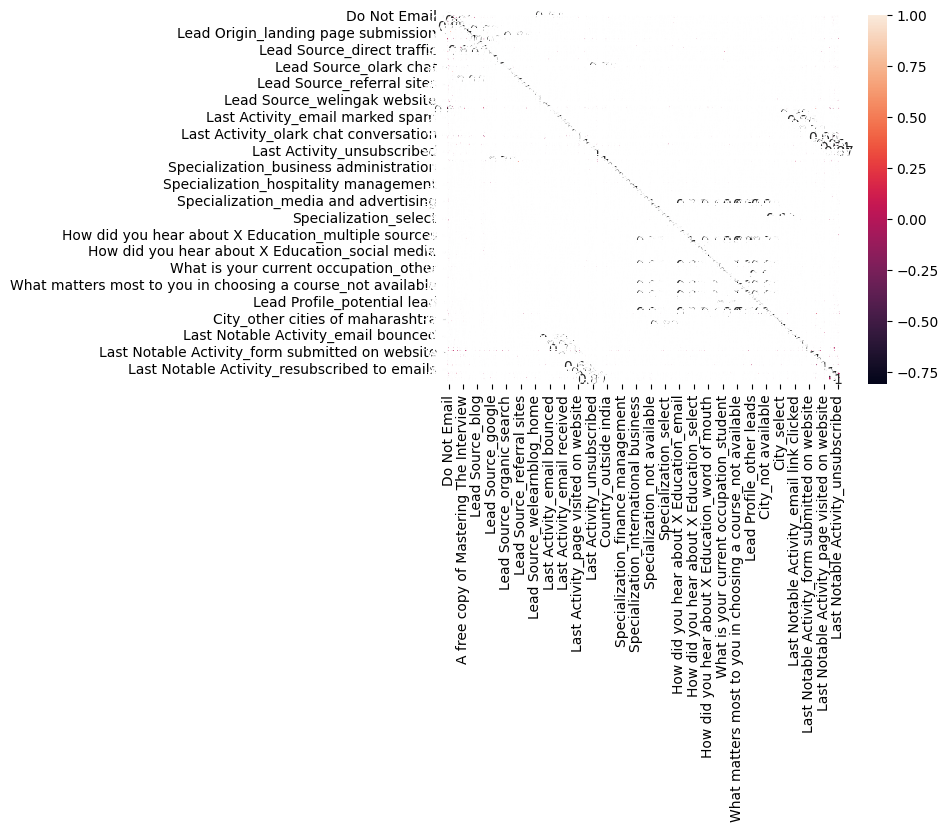

In [1719]:
sns.heatmap(X_train.corr(), annot = True)

The number of variables are too high so its not possible to eliminate the variables based on correlations. Lets use RFE to select the features

### RFE - Feature selection

In [1720]:
# selecting top 15 variables 

logreg = LogisticRegression()

rfe = RFE(logreg, n_features_to_select = 15)

In [1721]:
rfe = rfe.fit(X_train, y_train)

In [1722]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 31),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 30),
 ('A free copy of Mastering The Interview', False, 78),
 ('Lead Origin_landing page submission', False, 13),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 26),
 ('Lead Source_blog', False, 89),
 ('Lead Source_click2call', False, 76),
 ('Lead Source_direct traffic', False, 35),
 ('Lead Source_facebook', False, 6),
 ('Lead Source_google', False, 49),
 ('Lead Source_live chat', False, 52),
 ('Lead Source_nc_edm', False, 90),
 ('Lead Source_olark chat', False, 67),
 ('Lead Source_organic search', False, 34),
 ('Lead Source_pay per click ads', False, 68),
 ('Lead Source_press_release', False, 88),
 ('Lead Source_reference', False, 69),
 ('Lead Source_referral sites', False, 48),
 ('Lead Source_social media', False, 24),
 ('Lead Source_testone', False, 47),
 ('Lead Source_welearn', False, 60),
 ('Lead Source_welearnblog_home'

In [1723]:
# select all the selected features
col = X_train.columns[rfe.support_]

In [1724]:
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_lead add form', 'Lead Source_welingak website',
       'Last Activity_converted to lead',
       'Last Activity_olark chat conversation', 'Country_not available',
       'What is your current occupation_housewife',
       'What is your current occupation_working professional',
       'Lead Profile_lateral student', 'Lead Profile_potential lead',
       'Lead Profile_student of someschool',
       'Last Notable Activity_had a phone conversation',
       'Last Notable Activity_sms sent', 'Last Notable Activity_unreachable'],
      dtype='object')

In [1725]:
len(col)

15

In [1726]:
# filter selected features
X_train = X_train[col]

In [1727]:
X_train.shape

(6024, 15)

### Model building

In [1728]:
log1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())

In [1729]:
log1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6024
Model:                            GLM   Df Residuals:                     6008
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2270.3
Date:                Tue, 20 Jun 2023   Deviance:                       4540.6
Time:                        00:25:30   Pearson chi2:                 6.19e+03
No. Iterations:                    24   Pseudo R-squ. (CS):             0.4353
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.7037      0.061    -27.983      0.000      -1.823      -1.584
Do Not Email                                            -1.4761      0.178     -8.303      0.000      -1.825      -1.128
Total Time Spent on Website                              1.1011      0.044     25.232      0.000       1.016       1.187
Lead Origin_lead add form                                2.2869      0.252      9.084      0.000       1.793       2.780
Lead Source_welingak website                            23.9769   2.02e+04      0.001      0.999   -3.96e+04    3.96e+04
Last Activity_converted to lead                         -1.3046      0.223     -5.845      0.000      -1.742      -0.867
Last Activity_olark chat conversation                   -1.6530      0.185     -8.959      0.000      -2.015      -1.291
Country_not available                                    1.3299      0.110     12.049      0.000       1.114       1.546
What is your current occupation_housewife               26.1967   6.44e+04      0.000      1.000   -1.26e+05    1.26e+05
What is your current occupation_working professional     2.7283      0.224     12.198      0.000       2.290       3.167
Lead Profile_lateral student                            25.3641   4.97e+04      0.001      1.000   -9.74e+04    9.74e+04
Lead Profile_potential lead                              1.8437      0.105     17.528      0.000       1.638       2.050
Lead Profile_student of someschool                      -2.3728      0.573     -4.143      0.000      -3.495      -1.250
Last Notable Activity_had a phone conversation           2.6664      1.247      2.138      0.032       0.222       5.110
Last Notable Activity_sms sent                           1.6081      0.085     18.832      0.000       1.441       1.775
Last Notable Activity_unreachable                        1.6597      0.535      3.100      0.002       0.610       2.709
========================================================================================================================
"""

As seen above, some variable has high p - value, lets handle them

lets drop 'What is your current occupation_housewife'

In [1730]:
X_train.drop('What is your current occupation_housewife', axis = 1, inplace = True)

In [1731]:
log1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6024
Model:                            GLM   Df Residuals:                     6009
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2277.1
Date:                Tue, 20 Jun 2023   Deviance:                       4554.1
Time:                        00:25:30   Pearson chi2:                 6.21e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4340
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6935      0.061    -27.915      0.000      -1.812      -1.575
Do Not Email                                            -1.4814      0.178     -8.335      0.000      -1.830      -1.133
Total Time Spent on Website                              1.0997      0.044     25.249      0.000       1.014       1.185
Lead Origin_lead add form                                2.3273      0.251      9.280      0.000       1.836       2.819
Lead Source_welingak website                            22.9371   1.23e+04      0.002      0.999    -2.4e+04     2.4e+04
Last Activity_converted to lead                         -1.3118      0.223     -5.881      0.000      -1.749      -0.875
Last Activity_olark chat conversation                   -1.6573      0.184     -8.983      0.000      -2.019      -1.296
Country_not available                                    1.3217      0.110     11.999      0.000       1.106       1.538
What is your current occupation_working professional     2.7221      0.224     12.172      0.000       2.284       3.160
Lead Profile_lateral student                            24.3519   3.01e+04      0.001      0.999    -5.9e+04    5.91e+04
Lead Profile_potential lead                              1.8387      0.105     17.497      0.000       1.633       2.045
Lead Profile_student of someschool                      -2.3808      0.573     -4.153      0.000      -3.504      -1.257
Last Notable Activity_had a phone conversation           2.6568      1.246      2.131      0.033       0.214       5.100
Last Notable Activity_sms sent                           1.5997      0.085     18.755      0.000       1.433       1.767
Last Notable Activity_unreachable                        1.6508      0.535      3.084      0.002       0.602       2.700
========================================================================================================================
"""

now lets drop 'Lead Profile_lateral student'

In [1732]:
X_train.drop('Lead Profile_lateral student', axis = 1, inplace = True)

In [1733]:
log1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6024
Model:                            GLM   Df Residuals:                     6010
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2284.3
Date:                Tue, 20 Jun 2023   Deviance:                       4568.6
Time:                        00:25:30   Pearson chi2:                 6.25e+03
No. Iterations:                    23   Pseudo R-squ. (CS):             0.4326
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6854      0.061    -27.856      0.000      -1.804      -1.567
Do Not Email                                            -1.4720      0.177     -8.336      0.000      -1.818      -1.126
Total Time Spent on Website                              1.1030      0.043     25.371      0.000       1.018       1.188
Lead Origin_lead add form                                2.3726      0.250      9.494      0.000       1.883       2.862
Lead Source_welingak website                            22.9099   1.23e+04      0.002      0.999   -2.41e+04    2.41e+04
Last Activity_converted to lead                         -1.3202      0.223     -5.919      0.000      -1.757      -0.883
Last Activity_olark chat conversation                   -1.6631      0.185     -9.014      0.000      -2.025      -1.301
Country_not available                                    1.3210      0.110     12.017      0.000       1.106       1.536
What is your current occupation_working professional     2.7267      0.223     12.210      0.000       2.289       3.164
Lead Profile_potential lead                              1.8297      0.105     17.412      0.000       1.624       2.036
Lead Profile_student of someschool                      -2.3930      0.574     -4.167      0.000      -3.518      -1.268
Last Notable Activity_had a phone conversation           2.6522      1.246      2.128      0.033       0.210       5.094
Last Notable Activity_sms sent                           1.5937      0.085     18.700      0.000       1.427       1.761
Last Notable Activity_unreachable                        1.6435      0.535      3.070      0.002       0.594       2.693
========================================================================================================================
"""

now drop 'Lead Source_welingak website'

In [1734]:
X_train.drop('Lead Source_welingak website', axis = 1, inplace = True)

In [1735]:
log1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6024
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2297.8
Date:                Tue, 20 Jun 2023   Deviance:                       4595.5
Time:                        00:25:30   Pearson chi2:                 6.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4301
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6840      0.060    -27.853      0.000      -1.803      -1.566
Do Not Email                                            -1.4430      0.173     -8.321      0.000      -1.783      -1.103
Total Time Spent on Website                              1.1030      0.043     25.385      0.000       1.018       1.188
Lead Origin_lead add form                                3.0115      0.240     12.529      0.000       2.540       3.483
Last Activity_converted to lead                         -1.3157      0.223     -5.907      0.000      -1.752      -0.879
Last Activity_olark chat conversation                   -1.6698      0.185     -9.022      0.000      -2.033      -1.307
Country_not available                                    1.3257      0.110     12.064      0.000       1.110       1.541
What is your current occupation_working professional     2.7134      0.224     12.136      0.000       2.275       3.152
Lead Profile_potential lead                              1.8081      0.105     17.158      0.000       1.602       2.015
Lead Profile_student of someschool                      -2.4234      0.585     -4.139      0.000      -3.571      -1.276
Last Notable Activity_had a phone conversation           2.6561      1.244      2.134      0.033       0.217       5.095
Last Notable Activity_sms sent                           1.5942      0.085     18.751      0.000       1.428       1.761
Last Notable Activity_unreachable                        1.6411      0.535      3.065      0.002       0.592       2.691
========================================================================================================================
"""

Now P - value looks good for all variables

### VIF

Lets use VIF to select the features

In [1736]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Country_not available,2.10
2,Lead Origin_lead add form,1.49
1,Total Time Spent on Website,1.35
4,Last Activity_olark chat conversation,1.33
7,Lead Profile_potential lead,1.32
10,Last Notable Activity_sms sent,1.23
6,What is your current occupation_working profes...,1.21
0,Do Not Email,1.03
8,Lead Profile_student of someschool,1.03
3,Last Activity_converted to lead,1.01


VIF also looks good for all variables

In [1737]:
log1 = sm.GLM(y_train, sm.add_constant(X_train), family = sm.families.Binomial())

In [1738]:
res = log1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6024
Model:                            GLM   Df Residuals:                     6011
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2297.8
Date:                Tue, 20 Jun 2023   Deviance:                       4595.5
Time:                        00:25:30   Pearson chi2:                 6.83e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4301
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.6840      0.060    -27.853      0.000      -1.803      -1.566
Do Not Email                                            -1.4430      0.173     -8.321      0.000      -1.783      -1.103
Total Time Spent on Website                              1.1030      0.043     25.385      0.000       1.018       1.188
Lead Origin_lead add form                                3.0115      0.240     12.529      0.000       2.540       3.483
Last Activity_converted to lead                         -1.3157      0.223     -5.907      0.000      -1.752      -0.879
Last Activity_olark chat conversation                   -1.6698      0.185     -9.022      0.000      -2.033      -1.307
Country_not available                                    1.3257      0.110     12.064      0.000       1.110       1.541
What is your current occupation_working professional     2.7134      0.224     12.136      0.000       2.275       3.152
Lead Profile_potential lead                              1.8081      0.105     17.158      0.000       1.602       2.015
Lead Profile_student of someschool                      -2.4234      0.585     -4.139      0.000      -3.571      -1.276
Last Notable Activity_had a phone conversation           2.6561      1.244      2.134      0.033       0.217       5.095
Last Notable Activity_sms sent                           1.5942      0.085     18.751      0.000       1.428       1.761
Last Notable Activity_unreachable                        1.6411      0.535      3.065      0.002       0.592       2.691
========================================================================================================================
"""

In [1739]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Country_not available,2.10
2,Lead Origin_lead add form,1.49
1,Total Time Spent on Website,1.35
4,Last Activity_olark chat conversation,1.33
7,Lead Profile_potential lead,1.32
10,Last Notable Activity_sms sent,1.23
6,What is your current occupation_working profes...,1.21
0,Do Not Email,1.03
8,Lead Profile_student of someschool,1.03
3,Last Activity_converted to lead,1.01


Both VIF and P-value looks good. 

### Prediction

In [1740]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(sm.add_constant(X_train))

In [1741]:
y_train_pred.head(10)

4188    0.488402
540     0.128849
4262    0.211152
8747    0.211152
7190    0.574922
2944    0.568627
1694    0.211152
5309    0.074754
1498    0.141164
4613    0.995515
dtype: float64

In [1742]:
y_train_pred.shape

(6024,)

In [1743]:
y_train.shape

(6024,)

In [1744]:
y_train_pred = y_train_pred.values.reshape(-1)

Creating a dataframe with the actual Converted flag and the predicted probabilities

In [1745]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Converted_Prob
0,0,0.488402
1,0,0.128849
2,0,0.211152
3,0,0.211152
4,1,0.574922


Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [1746]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,predicted
0,0,0.488402,0
1,0,0.128849,0
2,0,0.211152,0
3,0,0.211152,0
4,1,0.574922,1


In [1747]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3368  385]
 [ 617 1654]]


In [1748]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8336653386454184


Accruacy of 83% is very good

In [1749]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [1750]:
# Calculating the sensitivity
TP/(TP+FN)

0.7283135182738881

In [1751]:
# Calculating the specificity
TN/(TN+FP)

0.8974154010125233

In [1752]:
# Calculate false postive rate - predicting converted when customer does not have converted
print(FP/ float(TN+FP))

0.10258459898747668


In [1753]:
# positive predictive value 
print (TP / float(TP+FP))

0.8111819519372241


In [1754]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8451693851944793


- Accruacy is 83.4%
- Sensitivity is 72.8%
- Specificity is 89.7% 


### Plotting the ROC Curve

An ROC curve demonstrates several things:

* It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
* The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
* The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [1755]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1756]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

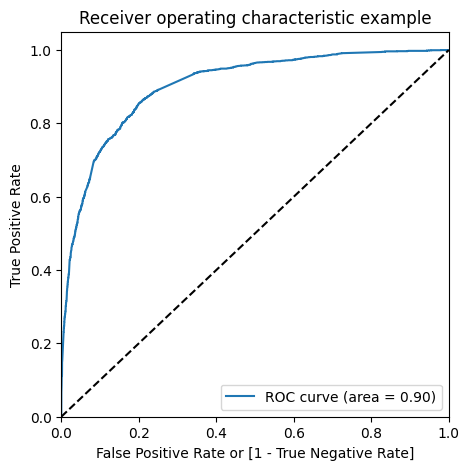

In [1757]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

ROC Curve Area is 0.90 which is good

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1758]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.488402,0,1,1,1,1,1,0,0,0,0,0
1,0,0.128849,0,1,1,0,0,0,0,0,0,0,0
2,0,0.211152,0,1,1,1,0,0,0,0,0,0,0
3,0,0.211152,0,1,1,1,0,0,0,0,0,0,0
4,1,0.574922,1,1,1,1,1,1,1,0,0,0,0


In [1759]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.376992  1.000000  0.000000
0.1   0.1  0.663347  0.966975  0.479616
0.2   0.2  0.761620  0.937032  0.655476
0.3   0.3  0.818061  0.859533  0.792966
0.4   0.4  0.825863  0.782915  0.851852
0.5   0.5  0.833665  0.728314  0.897415
0.6   0.6  0.819223  0.634522  0.930989
0.7   0.7  0.804947  0.565830  0.949640
0.8   0.8  0.783699  0.476002  0.969891
0.9   0.9  0.731408  0.307354  0.988010


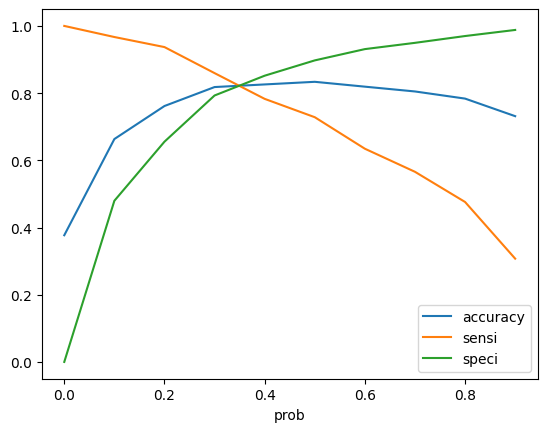

In [1760]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

 From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

In [1761]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Converted,Converted_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.488402,0,1,1,1,1,1,0,0,0,0,0,1
1,0,0.128849,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.211152,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.211152,0,1,1,1,0,0,0,0,0,0,0,0
4,1,0.574922,1,1,1,1,1,1,1,0,0,0,0,1


In [1762]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8227091633466136

In [1763]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3097,  656],
       [ 412, 1859]], dtype=int64)

In [1764]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1765]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8185821224130339

In [1766]:
# Let us calculate specificity
TN / float(TN+FP)

0.8252065014654942

In [1767]:
# Calculate false postive rate - predicting Converted when customer does not have Converted
print(FP/ float(TN+FP))

0.17479349853450574


In [1768]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7391650099403578


In [1769]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8825876318039327


* Final Accurucy - 82%
* Final Sensitivity - 81%
* Final Specficity - 82%

### Precision and recall tradeoff

In [1770]:
from sklearn.metrics import precision_recall_curve

In [1771]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6019    0
 6020    0
 6021    1
 6022    0
 6023    0
 Name: Converted, Length: 6024, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6019    0
 6020    0
 6021    1
 6022    0
 6023    0
 Name: predicted, Length: 6024, dtype: int64)

In [1772]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

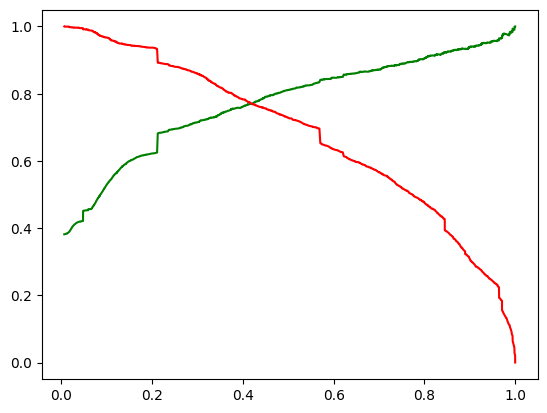

In [1773]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [1774]:
X_test.shape

(2583, 110)

In [1775]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [1776]:
col = X_train.columns
X_test = X_test[col]
X_test.shape

(2583, 12)

In [1777]:
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_lead add form,Last Activity_converted to lead,Last Activity_olark chat conversation,Country_not available,What is your current occupation_working professional,Lead Profile_potential lead,Lead Profile_student of someschool,Last Notable Activity_had a phone conversation,Last Notable Activity_sms sent,Last Notable Activity_unreachable
390,0,-0.704445,0,0,0,0,0,0,0,0,0,0
8918,0,0.055302,0,0,0,0,0,1,0,0,1,0
3580,0,-0.408272,0,1,0,0,0,0,0,0,0,0
3867,0,-0.870007,0,0,0,1,0,0,0,0,0,0
3815,0,-0.323652,0,1,0,0,0,0,0,0,0,0


In [1778]:
X_test_sm = sm.add_constant(X_test)

In [1779]:
y_test_pred = res.predict(X_test_sm)

In [1780]:
y_test_pred.head()

390     0.078633
8918    0.855612
3580    0.030768
3867    0.211152
3815    0.033677
dtype: float64

In [1781]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [1782]:
# Let's see the head
y_pred_1.head()

,0
390,0.078633
8918,0.855612
3580,0.030768
3867,0.211152
3815,0.033677


In [1783]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [1784]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1785]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [1786]:
y_pred_final.head()

,Converted,0
0,0,0.078633
1,0,0.855612
2,0,0.030768
3,0,0.211152
4,0,0.033677


In [1787]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [1788]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['Converted','Converted_Prob'], axis = 1)

In [1789]:
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.078633
1,0,0.855612
2,0,0.030768
3,0,0.211152
4,0,0.033677


In [1790]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_pred_final.head()

,Converted,Converted_Prob,final_predicted
0,0,0.078633,0
1,0,0.855612,1
2,0,0.030768,0
3,0,0.211152,0
4,0,0.033677,0


In [1791]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8219125048393341

In [1792]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1406,  235],
       [ 225,  717]], dtype=int64)

In [1793]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [1794]:
# Calculating the sensitivity
TP/(TP+FN)

0.7611464968152867

In [1795]:

# Calculating the specificity
TN/(TN+FP)

0.8567946374162096

# Conclusion

Summary after test model 
* Accuracy of test model - 81.8%
* Sensitivitiy of test model - 76.5%
* Specificity of test model - 85.7%